In [1]:
# Assigment 5
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    a = np.random.normal(exp, var ** 0.5, numb)
    arr[0] = V0
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr
def kalman_filt(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr, P, K

def kalman_filt_x(z, X0, P0, F, Q, R, H):
    
    arr = np.zeros([200, 2])
    P = np.zeros([200, 2 , 2])
    K = np.zeros([200, 2])
    arr[0] = X0
    P[0] = P0
    
    for i in range(1, len(X)):
        arr[i] = np.dot(F, arr[i - 1].reshape(2, 1)).reshape(1, 2)
        P[i] = np.dot(np.dot(F, P[i - 1]), F.transpose()) + Q

        K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)

        arr[i] = arr[i] + K[i] * (z[i] - np.dot(H, arr[i]))
        P[i] = (np.identity(2) - (K[i].reshape(2,1)).dot(H.reshape(1,2))).dot(P[i])
        
    return arr
def extrapol(x, m, F):
    arr = np.array(x)
    F_pow = np.linalg.matrix_power(F, m - 1)
    for i in range(len(x) - m + 1):
        arr[i + m - 1] = F_pow.dot(x[i])
    return arr
        

In [3]:
# PART 1
x0 = 5
v0 = 1
T = 1
sigmaa_2 = 0.2 ** 2
numb = 200
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [4]:
# PART 2
sigmaeta_2 = 20 ** 2
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 200)
z = x + eta

In [5]:
# PART 3
F = np.array([[1, T], [0, 1]])
G = np.array([T ** 2 / 2, T])
H = np.array([1, 0])

In [6]:
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])

In [7]:
for i in range(len(x)):
    z[i] = np.dot(H, X[i]) + eta[i]

In [21]:
# PART 4
Q = np.dot(np.dot(G, G.transpose()), sigmaa_2)
R = sigmaeta_2
X0 = np.array([2, 0])
P0 = np.array([[10000, 0], [0, 10000]])

X_filt, P, K = kalman_filt(z, X0, P0, F, Q, R, H)

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/2534033188.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


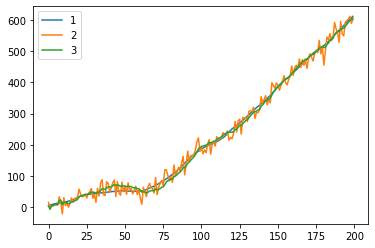

In [22]:
# PART 5
plt.plot(X[:,0])
plt.plot(z)
plt.plot(X_filt[:,0])
plt.legend(["1", "2", "3"])

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/2534033188.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/2534033188.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/2534033188.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


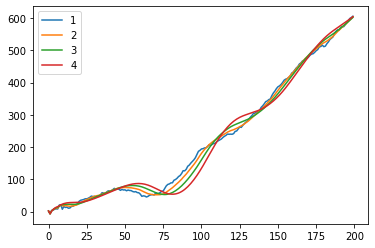

In [28]:
plt.plot(X_filt[:,0])
plt.plot(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0])
plt.plot(kalman_filt_x(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0])
plt.plot(kalman_filt_x(kalman_filt_x(kalman_filt_x(X_filt[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0], X0, P0, F, Q, R, H)[:,0])
plt.legend(["1", "2", "3", "4"])

Gain stable =  0.13895150652807645
Standard deviation of estimation error stable =  55.58060261123058


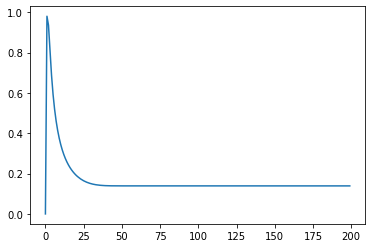

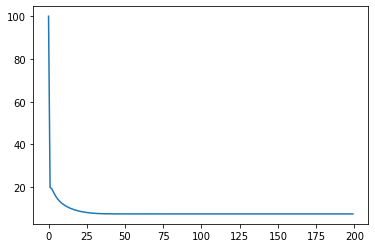

In [27]:
# PART 6
print("Gain stable = ", K[125, 0])
print("Standard deviation of estimation error stable = ", P[125, 0, 0])
plt.plot(K[:, 0])
plt.show()
plt.plot(P[:, 0, 0] ** 0.5)

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/3464141740.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/3464141740.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)
/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/3464141740.py:45: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


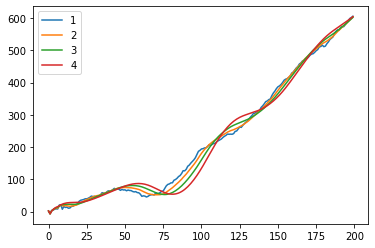

In [12]:
m = 7
X_extrapol = extrapol(X_filt, m, F)

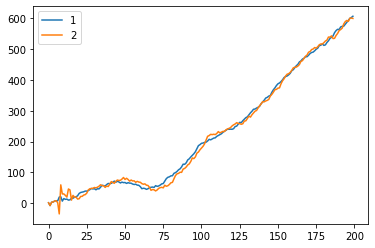

In [13]:
plt.plot(X_filt[:, 0])
plt.plot(X_extrapol[:, 0])
plt.legend(["1", "2"])

In [15]:
err1 = np.zeros([500, 197])
err2 = np.zeros([500, 197])
xf = X_filt
P0 = np.array([[10000, 0], [0, 10000]])
P_res = np.zeros([500, 2, 2])
xf, P_res[0] = kalman_filt(z, X0, P0, F, Q, R, H)[0:2]
for i in range(500):
    xf, P_res[i] = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)[:2]
    X_extrapol = extrapol(xf, m, F)
    err1[i] = (X[3:, 0] - xf[3:, 0]) ** 2
    err2[i] = (X[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err11 = np.zeros(500)
final_err12 = np.zeros(500)
for i in range(500):
    final_err11[i] = np.sqrt(np.mean(err1[i]))
    final_err12[i] = np.sqrt(np.mean(err2[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_71390/3464141740.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


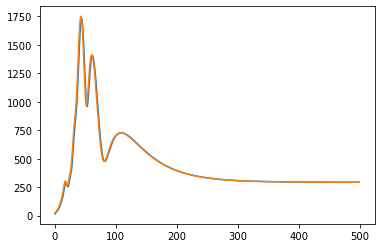

In [16]:
plt.plot(final_err11)
plt.plot(final_err12)

In [73]:
np.std(X_filt[:, 0] - z)

18.016908476221584

In [74]:
err = np.zeros([500, 197])
X0 = np.array([2, 0])
P0 = np.array([[100, 0], [0, 100]])
P_res = np.zeros([500, 2, 2])
xf, P_res[0] = kalman_filt(z, X0, P0, F, Q, R, H)[0:2]
for i in range(500):
    xf, P_res[i] = kalman_filt(xf[:, 0], X0, P0, F, Q, R, H)[:2]
    X_extrapol = extrapol(xf, m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
final_err2 = np.zeros(500)
for i in range(500):
    final_err2[i] = np.sqrt(np.mean(err[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_66748/3464141740.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


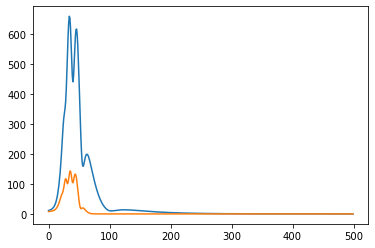

In [75]:
plt.plot(final_err)
plt.plot(final_err2)

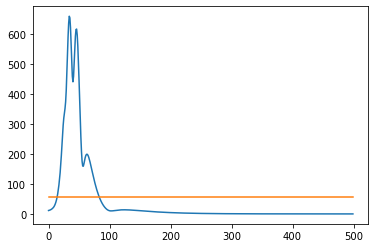

In [76]:
plt.plot(final_err)
plt.plot(P_res[:, 0, 0])

In [131]:
err = np.zeros([500, 197])
v,a = gnerate_vel_and_ac(0, 0, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = np.dot(np.dot(G, G.transpose()), 0)
P0 = np.array([[0, 0], [0, 0]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])
P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
xf, P_res[0], K_res[0] = kalman_filt(x, X[0], P0, F, Q, R, H)
for i in range(500):
    xf, P_res[i], K_res[i] = kalman_filt(xf[:, 0], X[0], P0, F, Q, R, H)
    X_extrapol = extrapol(xf, m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
#     plt.plot(xf[:, 0])
#     plt.show()
final_err3 = np.zeros(500)
for i in range(500):
    final_err3[i] = np.sqrt(np.mean(err[i]))

/var/folders/9y/cbn__xb93h3710lq08dsvk9r0000gn/T/ipykernel_66748/3464141740.py:26: RuntimeWarning: invalid value encountered in reciprocal
  K[i] = (P[i].dot(H.reshape(2, 1))).dot((((H.reshape(1,2)).dot(P[i])).dot(H.reshape(2, 1)) + R) ** (-1)).reshape(1, 2)


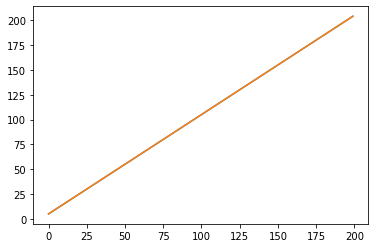

In [132]:
plt.plot(X[:,0])
plt.plot(xf[:, 0])

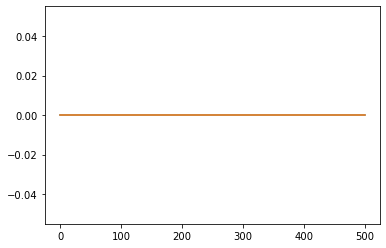

In [133]:
plt.plot(final_err3)
plt.plot(P_res[:, 0, 0] ** 0.5)

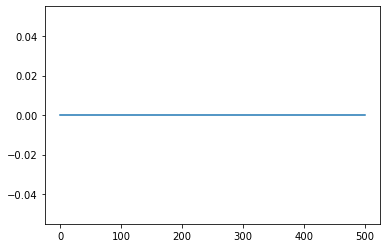

In [134]:
plt.plot(K_res[:, 0])

In [126]:
err = np.zeros([500, 197])
v,a = gnerate_vel_and_ac(0, simaa_2, T, v0, numb)
x = generate_x(T, x0, a, v)
Q = np.dot(np.dot(G, G.transpose()), 0)
P0 = np.array([[0, 0], [0, 0]])
X = np.zeros([200, 2])
X[0] = np.array([x[0], v[0]])
for i in range(1, len(X)):
    X[i] = np.dot(F, X[i - 1]) + np.dot(G, a[i - 1])
P_res = np.zeros([500, 2, 2])
K_res = np.zeros([500, 2])
xf, P_res[0], K_res[0] = kalman_filt(x, X[0], P0, F, Q, R, H)
for i in range(500):
    xf, P_res[i], K_res[i] = kalman_filt(xf[:, 0], X[0], P0, F, Q, R, H)
    X_extrapol = extrapol(xf, m, F)
    err[i] = (xf[3:, 0] - X_extrapol[3:, 0]) ** 2
#     plt.plot(xf[:, 0])
#     plt.show()
final_err3 = np.zeros(500)
for i in range(500):
    final_err3[i] = np.sqrt(np.mean(err[i]))

0.0

In [127]:
K

array([[0.        , 0.        ],
       [0.9803922 , 0.49019733],
       [0.93633024, 0.84269815],
       [0.80819452, 0.46696713],
       [0.68723322, 0.28840503],
       [0.59239726, 0.19472444],
       [0.51883084, 0.14009215],
       [0.46085175, 0.10559457],
       [0.41426167, 0.08247236],
       [0.37614062, 0.06624844],
       [0.34445421, 0.05444792],
       [0.31776085, 0.04561421],
       [0.29501811, 0.03884528],
       [0.2754569 , 0.03355848],
       [0.25849909, 0.02936391],
       [0.24370264, 0.02599261],
       [0.23072417, 0.02325414],
       [0.21929315, 0.02101054],
       [0.20919351, 0.01915979],
       [0.20025049, 0.01762505],
       [0.19232097, 0.01634746],
       [0.18528627, 0.01528124],
       [0.17904682, 0.01439027],
       [0.17351794, 0.01364566],
       [0.16862677, 0.01302397],
       [0.16430977, 0.01250602],
       [0.16051082, 0.01207588],
       [0.15717978, 0.01172021],
       [0.15427131, 0.01142774],
       [0.15174405, 0.01118885],
       [0.